<a href="https://colab.research.google.com/github/bhavyasathvika/Credit-card-fraud-detection-decisiontree/blob/main/credit_card_fraud_detection_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

import collections

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727




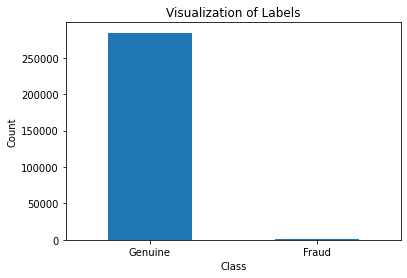

In [4]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])

fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))
print()
print()
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [5]:
df_train, df_test = train_test_split(df, test_size=0.2,random_state=123,stratify=df["Class"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=123,stratify=df_train["Class"])

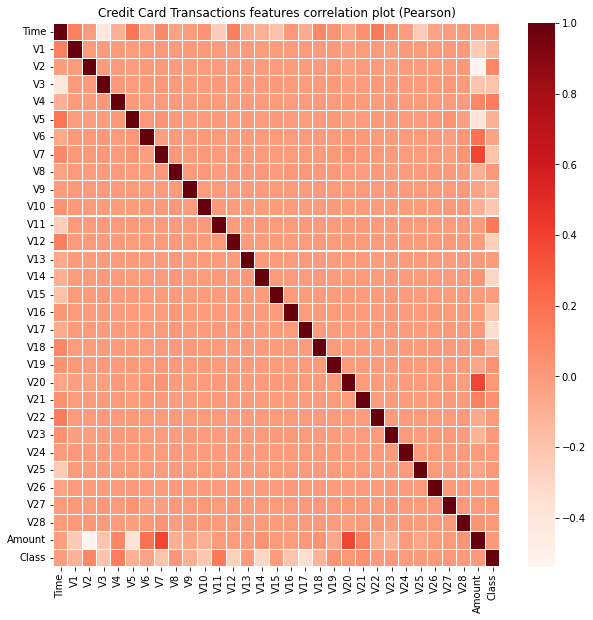

In [6]:
plt.figure(figsize = (10,10))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler


std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_train['scaled_amount'] = rob_scaler.fit_transform(df_train['Amount'].values.reshape(-1,1))
df_train['scaled_time'] = rob_scaler.fit_transform(df_train['Time'].values.reshape(-1,1))

df_train.drop(['Time','Amount'], axis=1, inplace=True)

In [8]:
X_train = df_train.drop(["Class"], axis = 1)
y_train = df_train["Class"]

In [9]:
df_val['scaled_amount'] = rob_scaler.fit_transform(df_val['Amount'].values.reshape(-1,1))
df_val['scaled_time'] = rob_scaler.fit_transform(df_val['Time'].values.reshape(-1,1))
df_val.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
X_val = df_val.drop(["Class"], axis = 1)
y_val = df_val["Class"]

In [11]:
dtc_cfl = DecisionTreeClassifier(random_state=1,max_depth=2)

dtc_cfl.fit(X_train, y_train)

y_predict = dtc_cfl.predict(X_train)


print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.85      0.76      0.80       295

    accuracy                           1.00    170883
   macro avg       0.92      0.88      0.90    170883
weighted avg       1.00      1.00      1.00    170883

[[170547     41]
 [    70    225]]


In [12]:
dtc_cfl = DecisionTreeClassifier(random_state=1,max_depth=2)

dtc_cfl.fit(X_train, y_train)

y_predict = dtc_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.74      0.76        99

    accuracy                           1.00     56962
   macro avg       0.89      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56843    20]
 [   26    73]]
